In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, pickle
import sys
from skimage import io
import os
import cv2
sys.path.append("../../")


%load_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
manual_scribble_dir = '/nadeem_lab/Gunjan/data/impartial/cellpose_manual_scribble_seciter_imgs/'
data_dir = '/nadeem_lab/Gunjan/data/impartial/cellpose/'

In [11]:
pd_file = pd.read_csv(data_dir + 'files.csv')

# scribble_filename = '/nadeem_lab/Gunjan/data/impartial/cellpose_imgs/new/003_img_cellpose_train_folder_rgblabel_scribble-1.png'
# image = cv2.imread(scribble_filename)

In [12]:
from skimage import morphology

def erosion_labels(label,radius_pointer=1): 
    #needed to generate scribbles from boundaries since in many cases 
    #there is no background between different instances
    selem = morphology.disk(radius_pointer)
    mask = np.zeros_like(label)
    for vlabel in np.unique(label):
        if vlabel != 0:
            mask_label = np.zeros_like(label)
            mask_label[label == vlabel] = 1
            aux = morphology.dilation(mask_label, selem=selem)
            if np.unique(aux*label).shape[0] > 2: #overlaps with other label
                erode_label = morphology.erosion(mask_label, selem=selem)
                mask[erode_label>0] = vlabel
            else:
                mask[mask_label>0] = vlabel
    ## Image Corners
    mask[:,0:radius_pointer] = label[:,0:radius_pointer]
    mask[:,-radius_pointer-1:] = label[:,-radius_pointer-1:]
    mask[0:radius_pointer,:] = label[0:radius_pointer,:]
    mask[-radius_pointer-1:,:] = label[-radius_pointer-1:,:]
    return mask

/nadeem_lab/Gunjan/data/impartial/cellpose/000_img_cellpose_train_folder.npz
/nadeem_lab/Gunjan/data/impartial/cellpose_manual_scribble_seciter_imgs/000_img_cellpose_train_folder_greench_label-scribble.png
check unique values scribbles : [0. 1.]
/nadeem_lab/Gunjan/data/impartial/cellpose_manual_scribble_seciter_imgs/000_img_cellpose_train_folder_greench_label-scribble.png
/nadeem_lab/Gunjan/data/impartial/cellpose/003_img_cellpose_train_folder.npz
/nadeem_lab/Gunjan/data/impartial/cellpose_manual_scribble_seciter_imgs/003_img_cellpose_train_folder_greench_label-scribble.png
check unique values scribbles : [0. 1.]
/nadeem_lab/Gunjan/data/impartial/cellpose_manual_scribble_seciter_imgs/003_img_cellpose_train_folder_greench_label-scribble.png
/nadeem_lab/Gunjan/data/impartial/cellpose/006_img_cellpose_train_folder.npz
/nadeem_lab/Gunjan/data/impartial/cellpose_manual_scribble_seciter_imgs/006_img_cellpose_train_folder_greench_label-scribble.png
check unique values scribbles : [0. 1.]
/nad

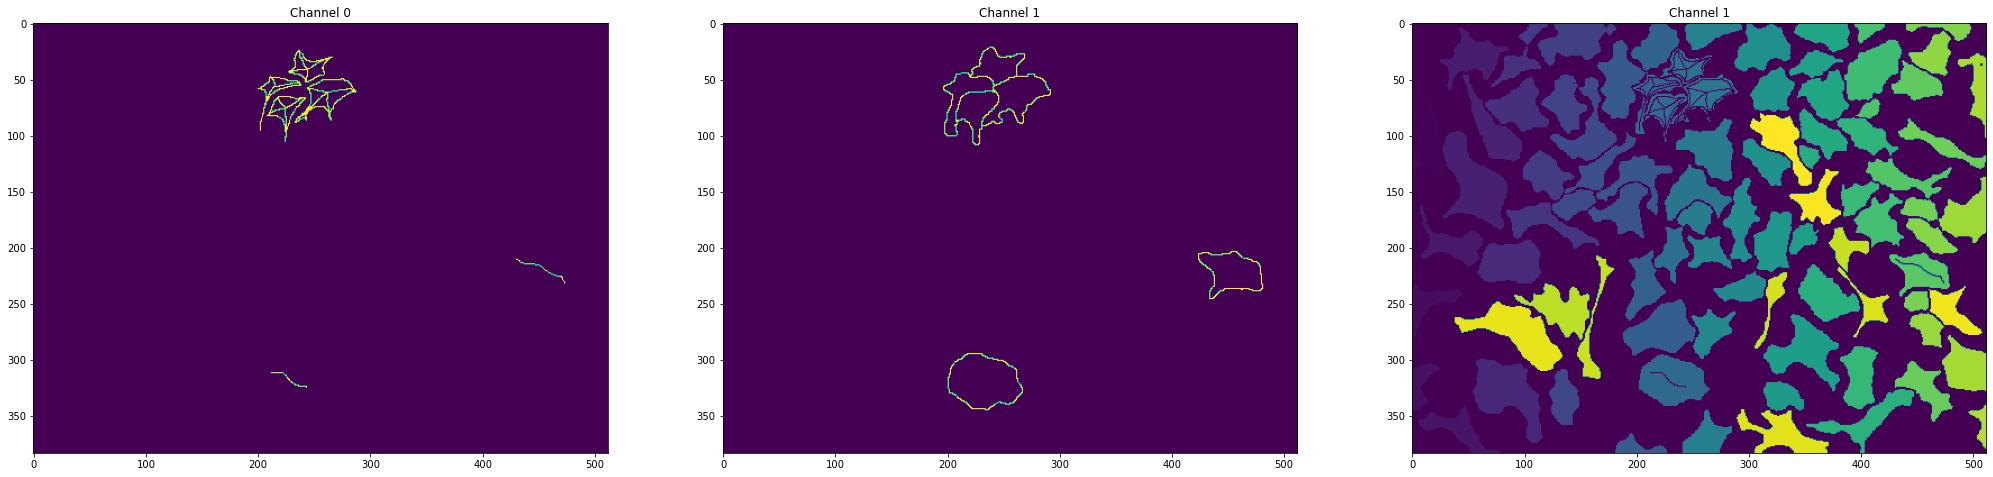

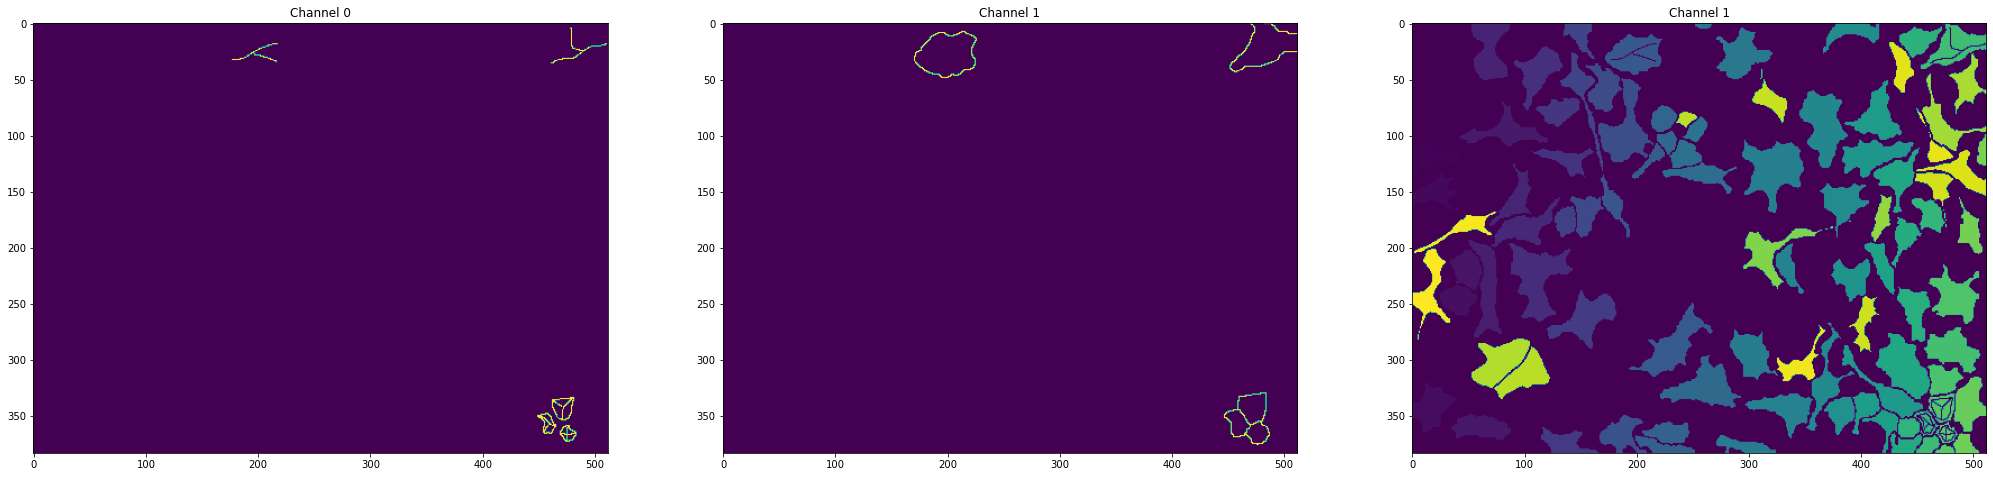

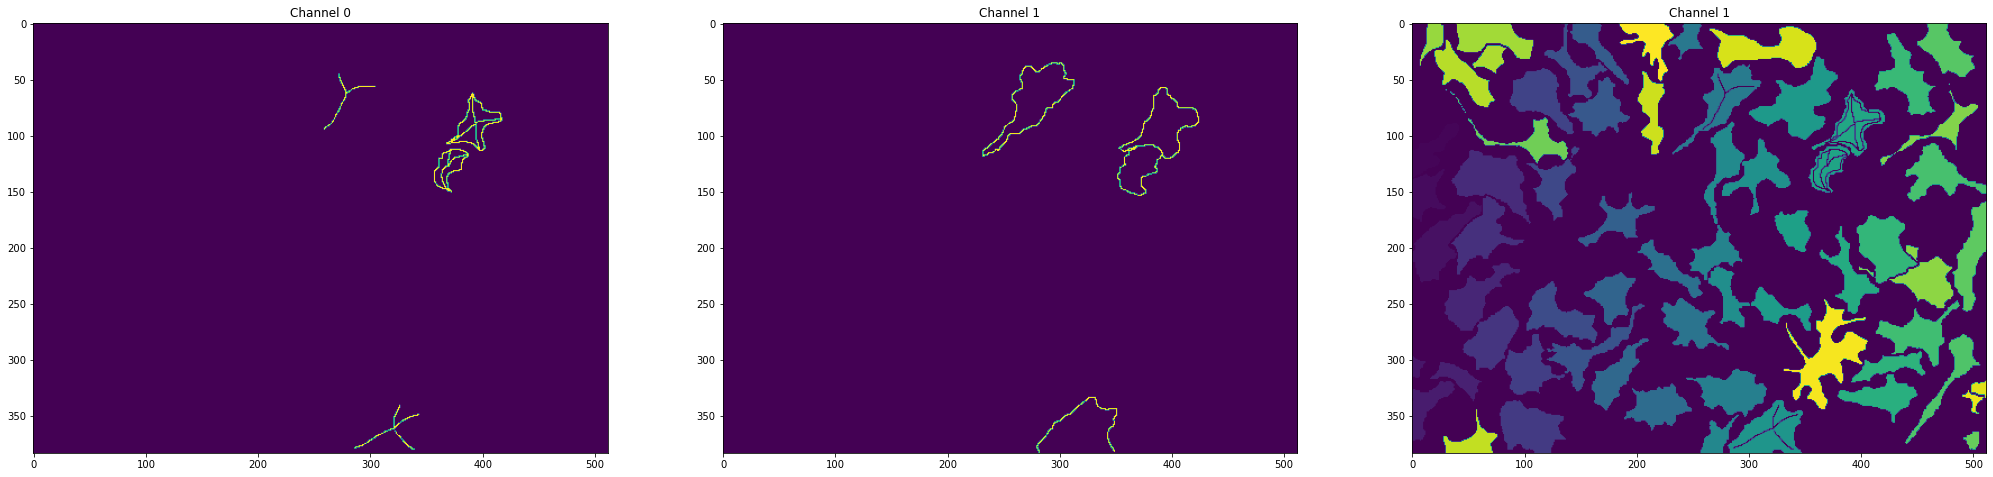

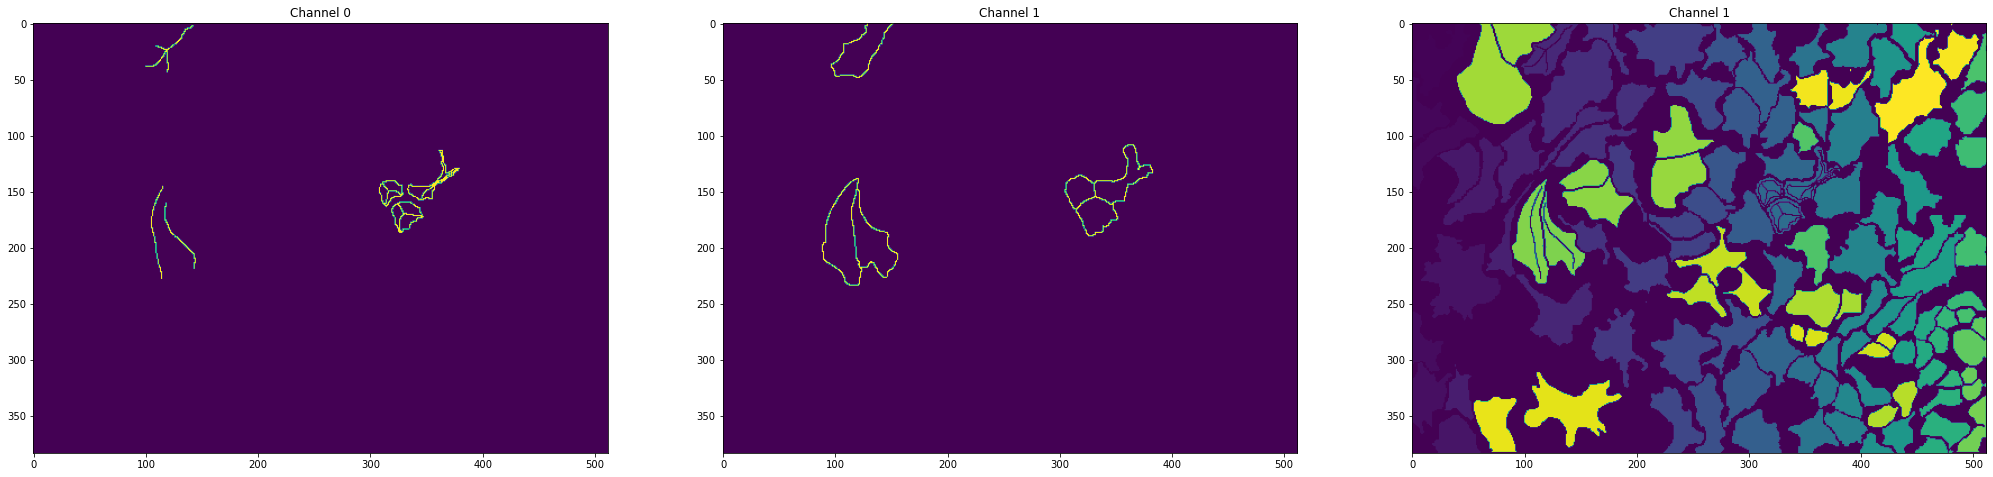

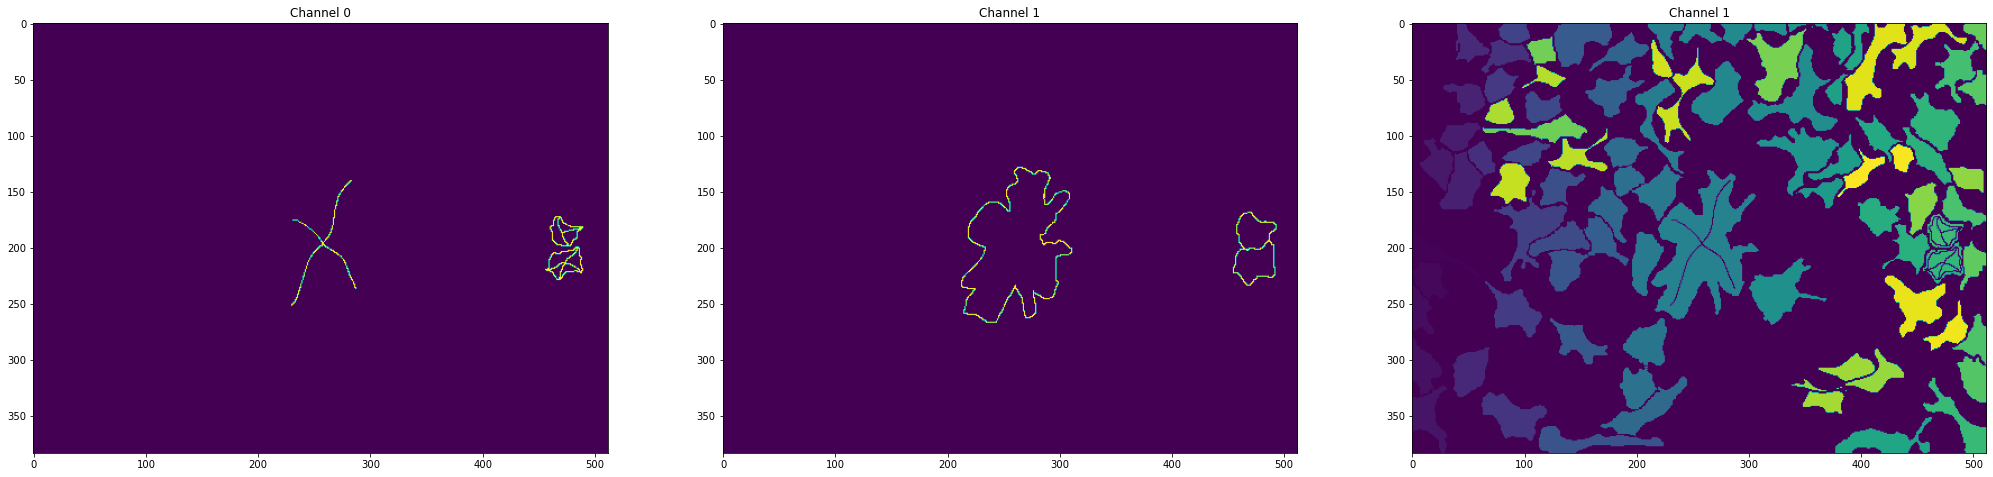

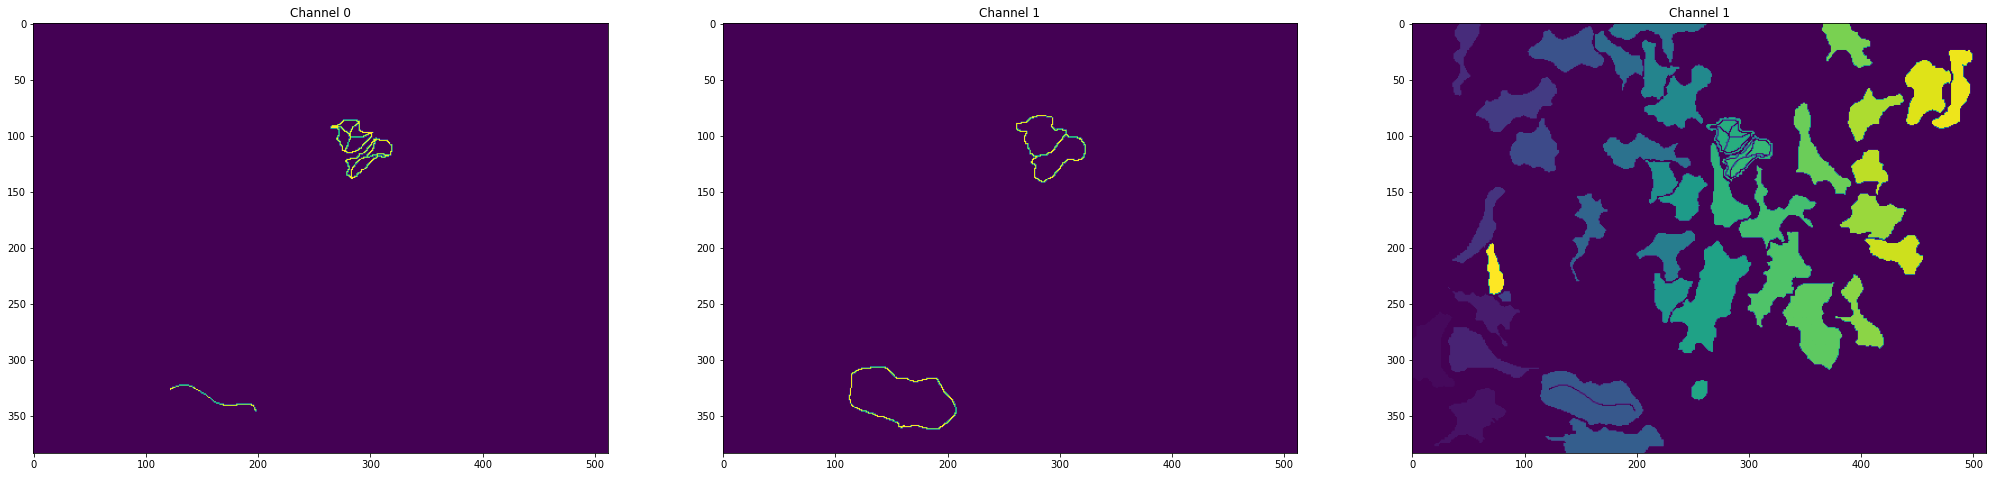

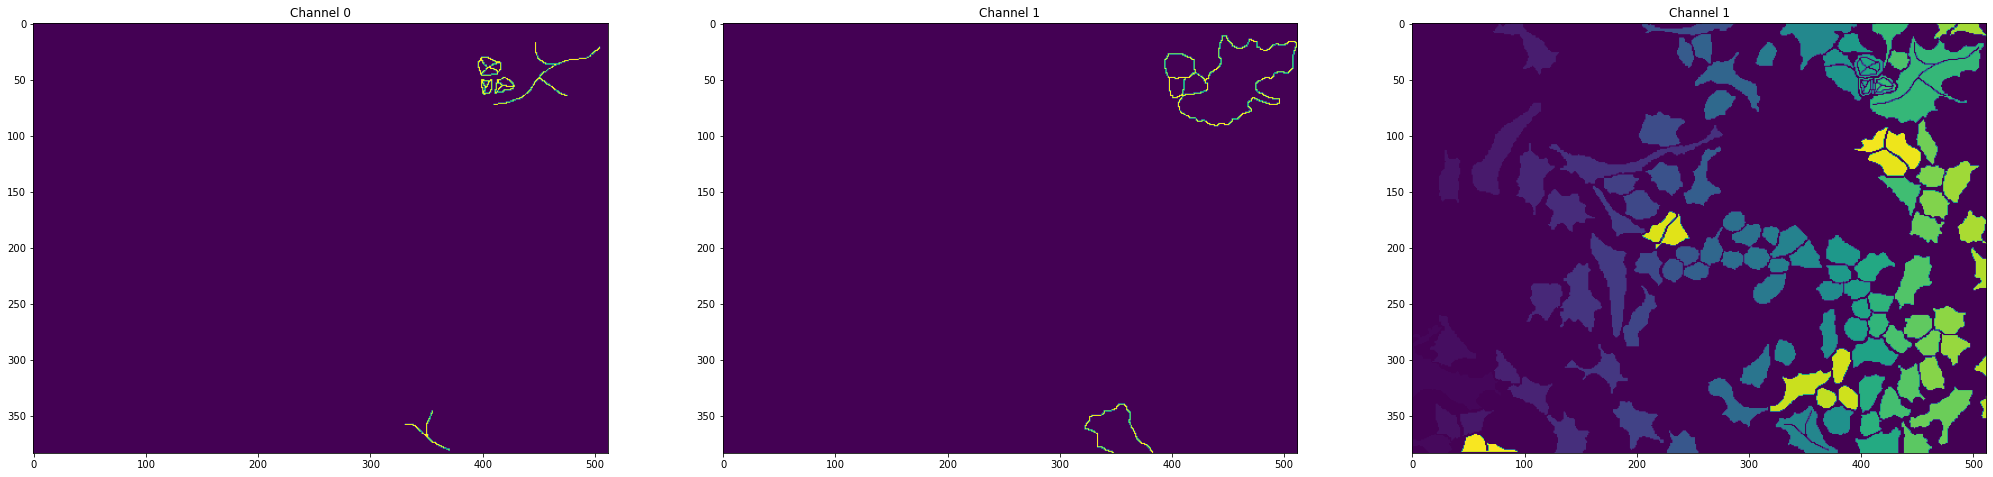

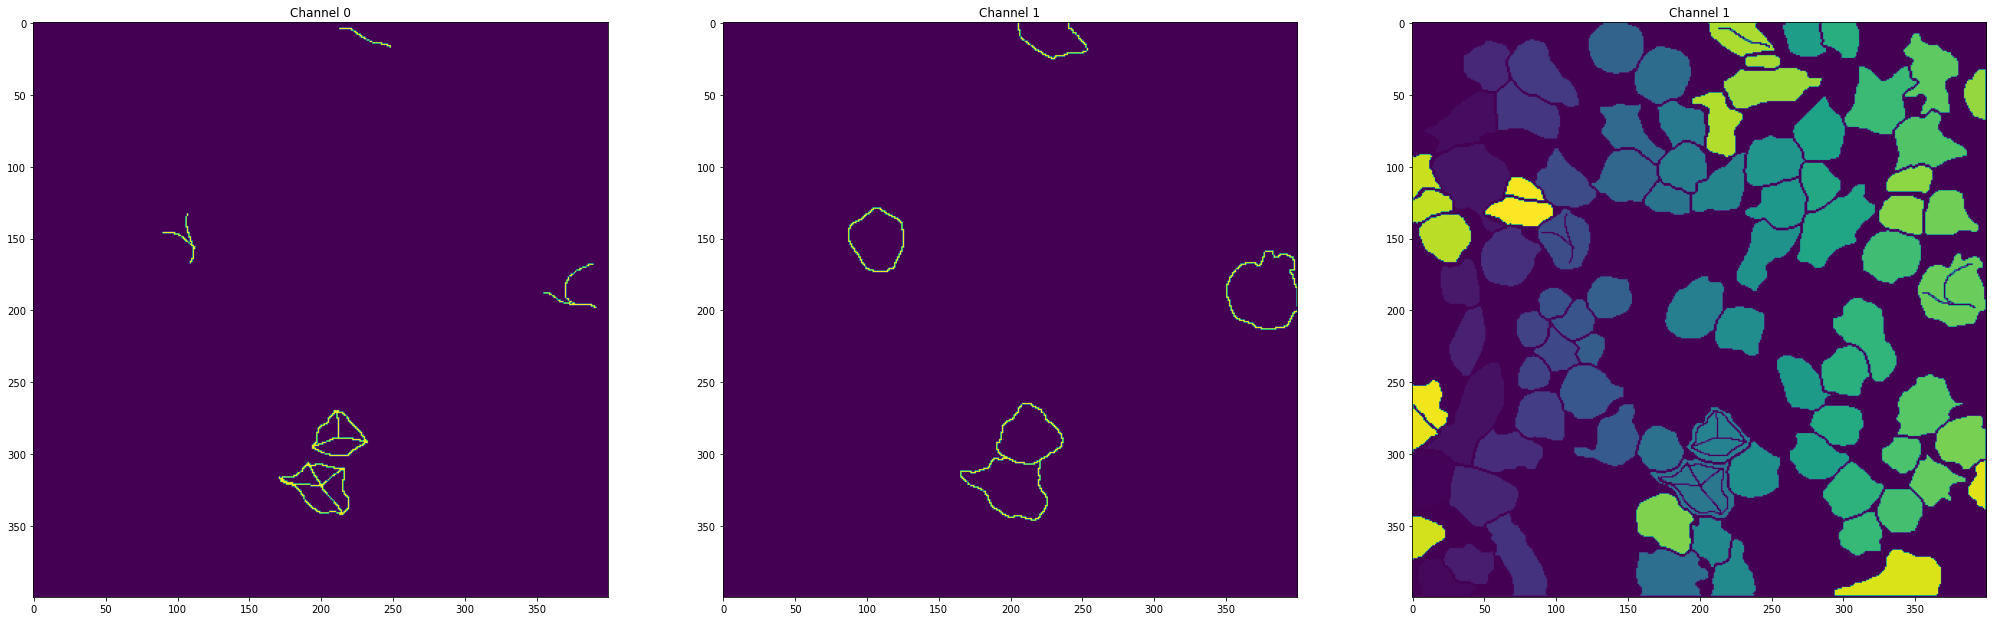

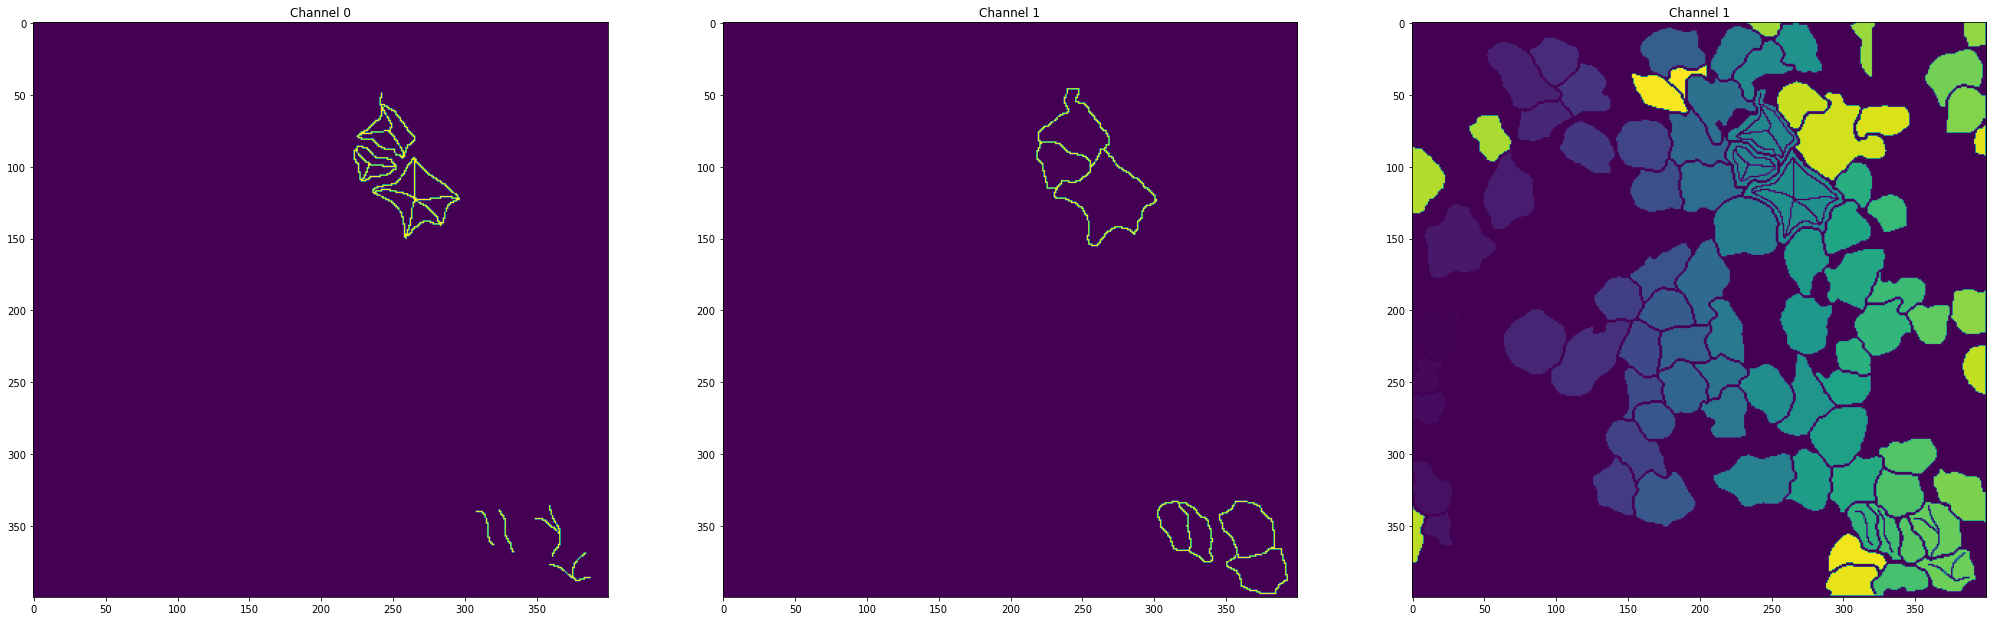

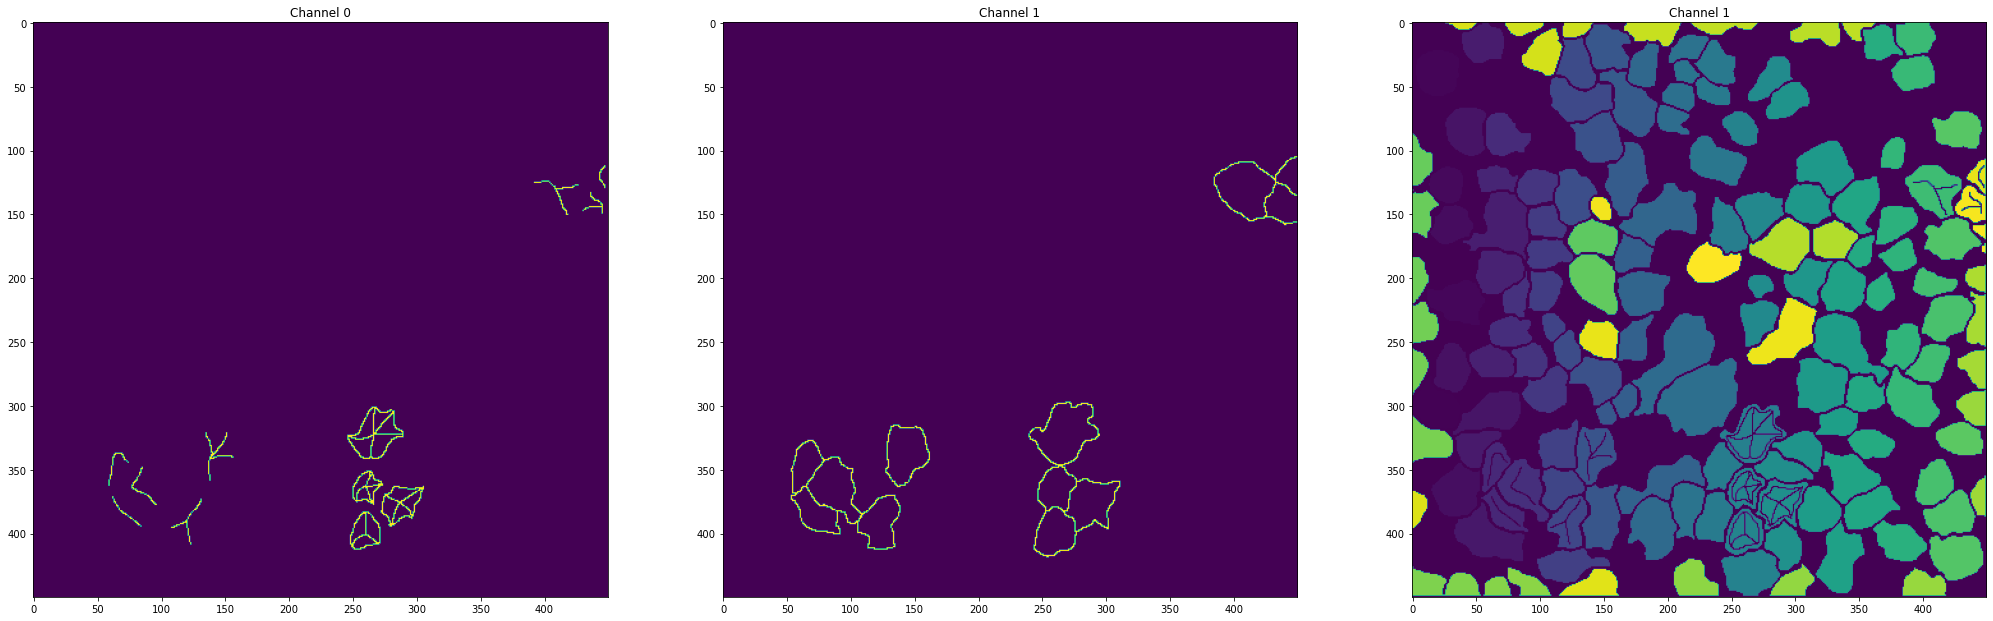

In [14]:
import copy

Y_gt_train_ch0_list = []
files_train_list_aux = []

for i in range(len(pd_file)):
    group = pd_file['group'][i]

    # if i == 5:
    #     break
    if group == 'train':
        print(data_dir + pd_file['input_file'][i])
        prefix = pd_file['prefix'][i]

        files_train_list_aux.append([data_dir ,
                                 pd_file['input_file'][i],
                                 pd_file['prefix'][i],])



        scribble_filename = manual_scribble_dir + prefix + '_greench_label-scribble.png'
        print(scribble_filename)
        image = cv2.imread(scribble_filename)

        blue = image[...,0]
        ret, bin_blue = cv2.threshold(blue, 127, 255, cv2.THRESH_BINARY)
        bin_blue = bin_blue/255
        # print("bin_blue unique", np.unique(bin_blue))
        

        red = image[...,2]
        ret, bin_red = cv2.threshold(red,127,255,cv2.THRESH_BINARY)
        bin_red = bin_red/255

        # print("bin_red unique", np.unique(bin_red))
        
        scribble = np.zeros([image.shape[0], image.shape[1], 2])
        validation_mask = np.zeros([image.shape[0], image.shape[1]]) #try  validation = False
        scribble[...,0] = bin_red #forground
        scribble[...,1] = bin_blue  #background

        print('check unique values scribbles :', np.unique(scribble))
        name_save = '_1task1class_10images_manual_scribble' + '.npz'
        np.savez(manual_scribble_dir + prefix + name_save, scribble=scribble, val_mask = validation_mask)


        print(scribble_filename)

        plt.figure(figsize=(35,35))
                
        plt.subplot(1,3,1)
        plt.title('Channel 0')
        plt.imshow(scribble[...,0])

        plt.subplot(1,3,2)
        plt.title('Channel 1')
        plt.imshow(scribble[...,1])

        plt.subplot(1,3,3)
        plt.title('Channel 1')
        plt.imshow(image[...,1])

        # scribbles_ch = [scribble]

        # npz_read = np.load(data_dir + pd_file['input_file'][i])
            
        # label0 = npz_read['label']
        # Y_gt_train_ch0_list.append(label0)
        # label_gt = label0[...,np.newaxis] 
        
        # files_train_list = copy.deepcopy(files_train_list_aux)

        # for ch in np.arange(len(scribbles_ch)):
        #     label_ch = label_gt[...,ch]
        #     s_ch = scribbles_ch[ch]

        #     #nlabels with scribbles
        #     label_wscribble = np.unique(label_ch[s_ch[...,0]>0].flatten())
        #     nscribbles = label_wscribble.shape[0]
        #     nlabels = np.unique(label_ch[label_ch>0]).shape[0]
        #     pixels_scribbled_TP = np.round(100*np.sum(s_ch[...,0]>0)/ (np.sum(label_ch>0)),2)
        #     pixels_scribbled_TN = np.round(100*np.sum(s_ch[...,1]>0)/ (np.sum(label_ch==0)),2)
        #     files_train_list[i].extend([int(nlabels),int(nscribbles),
        #                                 label_wscribble,pixels_scribbled_TP,pixels_scribbled_TN])

